In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics as st

In [3]:
# Initial set up and formatting of table. Retyping data for calculations.
ncaa = pd.read_csv("2021_Resources/2021_season.csv")
ncaa = ncaa.drop([0])
ncaa = ncaa.drop(["Unnamed: 8","Unnamed: 11","Unnamed: 14","Unnamed: 17","Unnamed: 20"], axis=1).dropna()
ncaa.columns = ["Rank","School","Games","Wins","Losses","W/L%","SRS","SOS",
                "Conf. Wins","Conf. Losses","Home Wins","Home Losses","Away Wins","Away Losses",
               "Team Points","Opp. Points","Minutes","FG","FGA","FG%","3P","3PA","3P%",
               "FT","FTA","FT%","ORB","TRB","AST","STL","BLK","TOV","PF"]
# Opponent stats. Initial set up and formatting. Retyping data.
ncaa_opp = pd.read_csv("2021_Resources/2021_season_opp.csv")
ncaa_opp = ncaa_opp.drop([0])
ncaa_opp = ncaa_opp.drop(["Unnamed: 8","Unnamed: 11","Unnamed: 14","Unnamed: 17","Unnamed: 20"], axis=1).dropna()
ncaa_opp.columns = ["Rank","School","Games","Wins","Losses","W/L%","SRS","SOS",
                "Conf. Wins","Conf. Losses","Home Wins","Home Losses","Away Wins","Away Losses",
               "Team Points","Opp. Points","Minutes","FG","FGA","FG%","3P","3PA","3P%",
               "FT","FTA","FT%","ORB","TRB","AST","STL","BLK","TOV","PF"]

# Sets display to show all columns and rows.
pd.set_option("display.max_rows", None, "display.max_columns", None)
ncaa = ncaa.astype({'Rank': 'int64', 'School':'string', 'Games':'int64', "Wins":"int64",
                   "Losses":"int64", "W/L%":"float64","SRS":"float64","SOS":"float64",
                    "Conf. Wins":"int64","Conf. Losses":"int64","Home Wins":"int64",
                    "Home Losses":"int64","Away Wins":"int64","Away Losses":"int64",
                    "Team Points":"int64","Opp. Points":"int64","Minutes":"int64",
                    "FG":"int64","FGA":"int64","FG%":"float64","3P":"int64","3PA":"int64",
                    "3P%":"float64","FT":"int64","FTA":"int64","FT%":"float64","ORB":"int64",
                    "TRB":"int64","AST":"int64","STL":"int64","BLK":"int64","TOV":"int64","PF":"int64"})

# Opponent stats. Sets display to show all columns and rows.
ncaa_opp = ncaa_opp.astype({'Rank': 'int64', 'School':'string', 'Games':'int64', "Wins":"int64",
                   "Losses":"int64", "W/L%":"float64","SRS":"float64","SOS":"float64",
                    "Conf. Wins":"int64","Conf. Losses":"int64","Home Wins":"int64",
                    "Home Losses":"int64","Away Wins":"int64","Away Losses":"int64",
                    "Team Points":"int64","Opp. Points":"int64","Minutes":"int64",
                    "FG":"int64","FGA":"int64","FG%":"float64","3P":"int64","3PA":"int64",
                    "3P%":"float64","FT":"int64","FTA":"int64","FT%":"float64","ORB":"int64",
                    "TRB":"int64","AST":"int64","STL":"int64","BLK":"int64","TOV":"int64","PF":"int64"})


In [4]:
# Advanced Stats
ncaa_adv = pd.read_csv("2021_Resources/2021_season_advanced.csv")
ncaa_adv = ncaa_adv.drop([0])
ncaa_adv = ncaa_adv.drop(["Unnamed: 8","Unnamed: 11","Unnamed: 14","Unnamed: 17","Unnamed: 20"], axis=1).dropna()
ncaa_adv.columns = ["Rank","School","Games","Wins","Losses","W/L%","SRS","SOS","Conf. Wins",
                    "Conf. Losses","Home Wins","Home Losses","Away Wins","Away Losses","Team Points",
                    "Opp. Points","Pace","Offensive Rating","Free Throw Attempt Rate",
                    "3P Attempt Rate","TS%","TRB%","AST%","STL%","BLK%","eFG%","TOV%",
                    "ORB%","FT/FGA"]

# Retyping
ncaa_adv = ncaa_adv.astype({'Rank': 'int64', 'School':'string', 'Games':'int64', "Wins":"int64",
                   "Losses":"int64", "W/L%":"float64","SRS":"float64","SOS":"float64",
                    "Conf. Wins":"int64","Conf. Losses":"int64","Home Wins":"int64",
                    "Home Losses":"int64","Away Wins":"int64","Away Losses":"int64",
                    "Team Points":"int64","Opp. Points":"int64","Pace":"float64",
                    "Offensive Rating":"float64","Free Throw Attempt Rate":"float64",
                   "3P Attempt Rate":"float64","TS%":"float64","TRB%":"float64",
                   "AST%":"float64","STL%":"float64","BLK%":"float64","eFG%":"float64",
                   "TOV%":"float64","ORB%":"float64","FT/FGA":"float64"})

# Opponent Advanced Stats
ncaa_opp_adv = pd.read_csv("2021_Resources/2021_season_opponent_advanced.csv")
ncaa_opp_adv = ncaa_opp_adv.drop([0])
ncaa_opp_adv = ncaa_opp_adv.drop(["Unnamed: 8","Unnamed: 11","Unnamed: 14","Unnamed: 17","Unnamed: 20"], axis=1).dropna()
ncaa_opp_adv.columns = ["Rank","School","Games","Wins","Losses","W/L%","SRS","SOS","Conf. Wins",
                        "Conf. Losses","Home Wins","Home Losses","Away Wins","Away Losses","Team Points",
                        "Opp. Points","Pace","Offensive Rating","Free Throw Attempt Rate",
                        "3P Attempt Rate","TS%","TRB%","AST%","STL%","BLK%","eFG%","TOV%",
                        "ORB%","FT/FGA"]

# Opponent Retyping
ncaa_opp_adv = ncaa_opp_adv.astype({'Rank': 'int64', 'School':'string', 'Games':'int64', "Wins":"int64",
                   "Losses":"int64", "W/L%":"float64","SRS":"float64","SOS":"float64",
                    "Conf. Wins":"int64","Conf. Losses":"int64","Home Wins":"int64",
                    "Home Losses":"int64","Away Wins":"int64","Away Losses":"int64",
                    "Team Points":"int64","Opp. Points":"int64","Pace":"float64",
                    "Offensive Rating":"float64","Free Throw Attempt Rate":"float64",
                   "3P Attempt Rate":"float64","TS%":"float64","TRB%":"float64",
                   "AST%":"float64","STL%":"float64","BLK%":"float64","eFG%":"float64",
                   "TOV%":"float64","ORB%":"float64","FT/FGA":"float64"})

In [5]:
# Formatting tables for html.
ncaa = ncaa.drop(["Rank"],axis=1)
ncaa_adv = ncaa_adv.drop(["Rank"],axis=1)
ncaa_opp = ncaa_opp.drop(["Rank"],axis=1)
ncaa_opp_adv = ncaa_opp_adv.drop(["Rank"],axis=1)

In [6]:
ncaa["W/L%"] = round(ncaa["W/L%"] * 100,1)
ncaa_adv["W/L%"] = round(ncaa_adv["W/L%"] * 100,1)
ncaa_adv["TS%"] = round(ncaa_adv["TS%"] * 100,1)
ncaa_adv["eFG%"] = round(ncaa_adv["eFG%"] *100,1)
ncaa_opp["W/L%"] = round(ncaa_opp["W/L%"] * 100,1)
ncaa_opp_adv["W/L%"] = round(ncaa_opp_adv["W/L%"] * 100,1)
ncaa_opp_adv["TS%"] = round(ncaa_opp_adv["TS%"] * 100,1)
ncaa_opp_adv["eFG%"] = round(ncaa_opp_adv["eFG%"] * 100,1)

In [7]:
def remove_NCAA(school):
    school = school.replace(" NCAA","")
    return school

In [8]:
# Key Stats
cs = pd.DataFrame()

# Pulls Additional Stats
cs["School"] = ncaa["School"]
cs["Games"] = ncaa["Games"]
cs["ORS%"] = round(100 * (ncaa["ORB"] / (ncaa["ORB"] + (ncaa_opp["TRB"] - ncaa_opp["ORB"]))),2)
cs["DRS%"] = round(100 * (ncaa["TRB"] - ncaa["ORB"]) / ((ncaa["TRB"] - ncaa["ORB"]) + ncaa_opp["ORB"]),2)
cs["TRS%"] = cs["ORS%"] + cs["DRS%"]
cs["A%"] = round((ncaa["AST"] / ncaa["FG"]),2)
cs["Pace"] = ncaa_adv["Pace"]
cs["FGA"] = ncaa["FGA"]
cs["FG%"] = ncaa["FG%"]
cs["FT/FGA"] = ncaa_adv["FT/FGA"]
cs["FT%"] = ncaa["FT%"]
cs["FT"] = ncaa["FT"]
cs["FTA"] = ncaa["FTA"]
cs["3PAr"] = ncaa_adv["3P Attempt Rate"]
cs["2P%"] =  ((ncaa["FG"] - ncaa["3P"]) / (ncaa["FGA"] - ncaa["3PA"]))
cs["3P%"] = ncaa["3P%"]
cs["AST"] = ncaa["AST"]

# Filter Stats
cs["W%"] = round(100 * (ncaa["Wins"]/ncaa["Games"]),1)
cs["SOS"] = ncaa["SOS"]

In [9]:
zwaz = pd.DataFrame()
zwaz["School"] = cs["School"]
zwaz["W%"] = cs["W%"]
zwaz["FF"] = ((ncaa_adv["eFG%"] / 100) * 0.4) * ((ncaa_adv["TOV%"] / 100) * 0.25) * (cs["TRS%"] / 100) * (cs["FT/FGA"])

### Points created from turnovers. ###
# Turnover Differential %
zwaz["TDiff"] = (ncaa_adv["BLK%"] + ncaa_adv["STL%"]) - ncaa_adv["TOV%"]
# Turnover Diff Possessions
zwaz["TDiff"] = ((zwaz["TDiff"] / 100) * cs["Pace"])
# Turnover Diff Points
zwaz["TDiff"] = zwaz["TDiff"] * (ncaa["Team Points"] / (cs["Pace"] * ncaa["Games"]))

### Points created from free throws. ###
zwaz["FT"] = ncaa["FT"] / ncaa["Games"]

### Two point threat. ###
zwaz["T2"] = 2 * (((((ncaa["FGA"] - ncaa["3PA"]) / cs["Pace"]) * st.mean(cs["Pace"])) * cs["2P%"]) / ncaa["Games"])

### Three point threat. ###
zwaz["T3"] = 3 * ((((ncaa["3PA"] / cs["Pace"]) * st.mean(cs["Pace"])) * ncaa["3P%"]) / ncaa["Games"])

### Examines fouls. ###
# Fouls per possession.
zwaz["F"] = ncaa["PF"] / (cs["Pace"] * ncaa["Games"])
# Fouls per national average game.
zwaz["F"] = zwaz["F"] * st.mean(cs["Pace"])
# Opponent free throws per national average game.
zwaz["F"] = (ncaa_opp["FTA"] / ncaa["PF"]) * zwaz["F"]
# Opponent foul points per game.
zwaz["F"] = (zwaz["F"] * st.mean(ncaa["FT%"]))

# Sums points from fts, twos, threes, and the turnover differential.
# Subtracts heavily averaged opponent free throw points.
zwaz["MY"] = (zwaz["TDiff"] + zwaz["FT"] + zwaz["T3"] + zwaz["T2"]) - zwaz["F"]

In [10]:
zwaz = zwaz.sort_values("MY",ascending=False)
zwaz.head(25)

,School,W%,TDiff,FT,T2,T3,F,MY
22,Baylor,95.5,7.593318,11.909091,41.369169,31.561650,11.992200,80.441027
136,Iowa,74.1,6.547852,14.851852,39.094186,29.739631,10.187823,80.045698
112,Gonzaga,100.0,3.598920,16.440000,50.258806,19.687282,10.556081,79.428927
63,Colgate,92.3,5.100000,14.923077,42.831986,24.676559,10.914152,76.617470
17,Arkansas,80.8,8.164154,15.807692,40.129412,22.322199,11.764050,74.659407
124,Houston,87.5,10.649000,13.750000,37.132862,28.863165,15.972551,74.422476
302,Syracuse,65.2,9.899043,13.956522,37.648727,23.355306,10.614618,74.244979
81,Drake,86.2,4.490000,10.517241,47.746950,22.029752,11.660021,73.123923
169,Marshall,71.4,7.323333,11.428571,39.275206,26.335926,11.438083,72.924954
293,Southern Utah,86.4,1.853000,17.000000,38.771624,25.386697,11.178001,71.833320


In [11]:
ncaa.head()

,School,Games,Wins,Losses,W/L%,SRS,SOS,Conf. Wins,Conf. Losses,Home Wins,Home Losses,Away Wins,Away Losses,Team Points,Opp. Points,Minutes,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
1,Abilene Christian,25,21,4,84.0,5.18,-8.11,13,2,13,0,5,4,1924,1518,1000,686,1500,0.457,194,563,0.345,358,539,0.664,282,892,450,245,79,348,497
2,Air Force,24,5,19,20.8,-12.26,0.32,3,17,3,8,1,10,1416,1718,960,500,1119,0.447,172,509,0.338,244,351,0.695,109,563,294,168,55,348,402
3,Akron,21,14,7,66.7,2.88,-1.33,12,6,9,1,5,5,1650,1512,845,573,1280,0.448,204,605,0.337,300,396,0.758,237,815,285,110,76,255,380
4,Alabama A&M,15,6,9,40.0,-18.99,-15.12,4,9,5,2,1,7,950,1008,610,347,868,0.400,83,286,0.290,173,276,0.627,160,577,165,82,54,229,273
5,Alabama-Birmingham,27,21,6,77.8,6.12,-3.92,13,5,15,2,6,4,1972,1624,1080,735,1619,0.454,137,447,0.306,365,526,0.694,284,992,289,218,112,286,416


In [12]:
ncaa_adv.head()

,School,Games,Wins,Losses,W/L%,SRS,SOS,Conf. Wins,Conf. Losses,Home Wins,Home Losses,Away Wins,Away Losses,Team Points,Opp. Points,Pace,Offensive Rating,Free Throw Attempt Rate,3P Attempt Rate,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA
1,Abilene Christian,25,21,4,84.0,5.18,-8.11,13,2,13,0,5,4,1924,1518,72.6,106.0,0.359,0.375,54.8,51.1,65.6,13.5,9.5,52.2,16.5,31.1,0.239
2,Air Force,24,5,19,20.8,-12.26,0.32,3,17,3,8,1,10,1416,1718,63.7,92.5,0.314,0.455,55.1,40.5,58.8,11.0,7.4,52.4,21.3,15.9,0.218
3,Akron,21,14,7,66.7,2.88,-1.33,12,6,9,1,5,5,1650,1512,70.6,110.7,0.309,0.473,56.2,52.2,49.7,7.4,8.9,52.7,14.8,31.1,0.234
4,Alabama A&M,15,6,9,40.0,-18.99,-15.12,4,9,5,2,1,7,950,1008,70.1,88.9,0.318,0.329,47.5,49.8,47.6,7.7,9.1,44.8,18.6,28.1,0.199
5,Alabama-Birmingham,27,21,6,77.8,6.12,-3.92,13,5,15,2,6,4,1972,1624,69.3,105.4,0.325,0.276,52.8,51.4,39.3,11.7,11.9,49.6,13.3,29.1,0.225


In [13]:
zwaz = zwaz.sort_values("School")
cs = cs.sort_values("School")

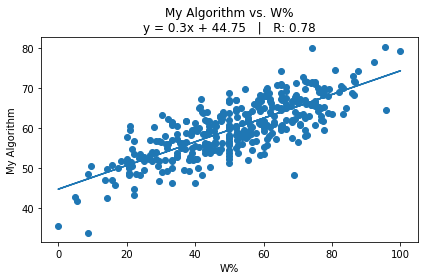

In [14]:
b = "MY"
a = "W%"
x = cs[a] # Change this one.
y = zwaz[b]
plt.scatter(x,y)
slope,intercept,rvalue,pvalue,stderr = stats.linregress(x,y)
regression_line = slope * x + intercept
equation = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(x, regression_line)
plt.xlabel(a)
plt.ylabel("My Algorithm")
plt.title(f"My Algorithm vs. {a}\n{equation}   |   R: {round(rvalue,2)}")
plt.tight_layout()
plt.savefig(f"Graphs/My-Algorithm_vs_{a}")
plt.show()